PROJET : COMBINAISON DES TECHNIQUES DE CLUSTERING ET D’ACP POUR LA SEGMENTATION DE CLIENTELE 

La segmentation de la clientèle d'une entreprise est une pratique de division des clients en 
groupes d'individus ayant les mêmes caractéristiques. Cette stratégie permet de comprendre le 
comportement des clients, sur la base de leurs données historiques

La segmentation est effectuée par une 
technique d'apprentissage automatique non supervisée appelée Clustering. L'algorithme de 
clustering le plus populaire est KMeans. Dans ce projet, nous montrerons comment utiliser cet 
algorithme pour segmenter les clients d'une entreprise. Nous montrerons également comment 
combiner KMeans et l'Analyse en Composantes Principales afin d'améliorer la qualité de la 
segmentation. 

LIBRAIRIES

In [48]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA 
import pickle 

DONNEES 

In [2]:
# Importation des données 
import pandas as pd

url = "https://raw.githubusercontent.com/JerryKumako/Projets-Machine-Learning/refs/heads/main/segmentation%20data.csv"

df = pd.read_csv(url)

df.head() 

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [4]:
# Dimension des données 
print('La dataframe contient', df.shape[0], 'ligne (chaque ligne représente un client) et', df.shape[1], 'colonnes')

La dataframe contient 2000 ligne (chaque ligne représente un client) et 8 colonnes


DESCRIPTION DE CHAQUE VARIABLE  

• Sex 

1: Female, 0: Male 

• Marital Status 

0: single, 1: non-single 

• Education 

0: other/unknown, 1: high-school, 2:university, 3:graduate school 

• Occupation 

0: unemployed, 1: skilled, 2: highly qualified 

• settlement size 

0: small, 1: mid-sized, 2:big

In [5]:
# Données manquantes 

df.isna().sum() 

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

Il n'y a pas de valeurs manquantes dans les données. Vérifions que les formats de stockage des 
valeurs au niveau de chaque variable : 

In [6]:
df.dtypes 

ID                 int64
Sex                int64
Marital status     int64
Age                int64
Education          int64
Income             int64
Occupation         int64
Settlement size    int64
dtype: object

Les valeurs sont stockées dans le bon format. 

ANALYSE EXPLORATOIRE DES DONNEES

In [7]:
# Résumé statistique 
df.describe() 

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


L'âge est compris entre 18 et 76 ans. L'âge médian est de 33 ans. Le revenu est compris entre 
35832 et 309364 dollars. Le revenu médian est de 115548,5 $. 

C:\Users\User\AppData\Local\Temp\ipykernel_3336\2922807550.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"])


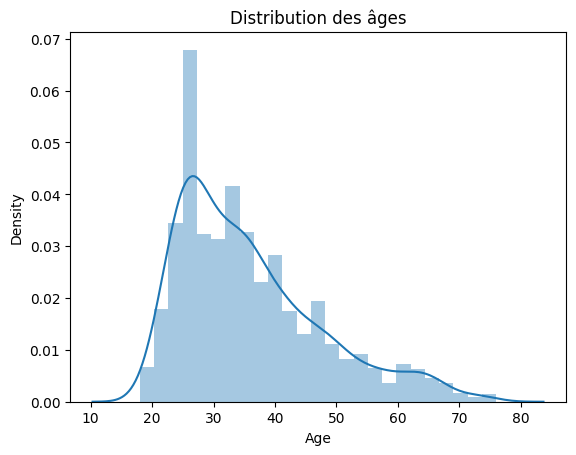

In [50]:
# Distribution de la variable 'Age' 
sns.distplot(df["Age"]) 
plt.title('Distribution des âges') 

plt.savefig('g1.png')  # Enregistrer l'image

plt.show()
plt.close()

C:\Users\User\AppData\Local\Temp\ipykernel_3336\110271265.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Income"])


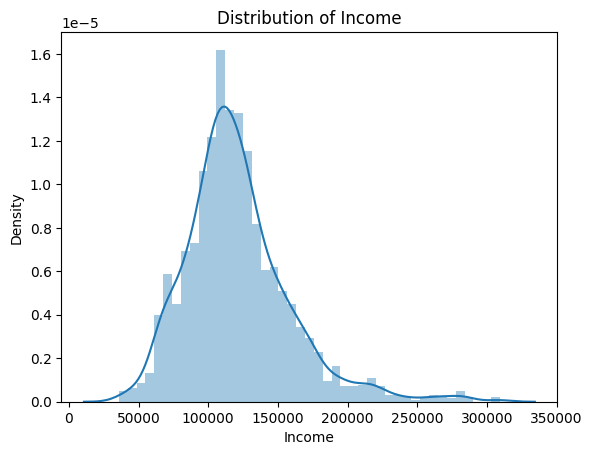

In [51]:
# Distribution de la variable 'Income' 
sns.distplot(df["Income"]) 
plt.title('Distribution of Income') 

plt.savefig('g2.png')  # Enregistrer l'image

plt.show()
plt.close()

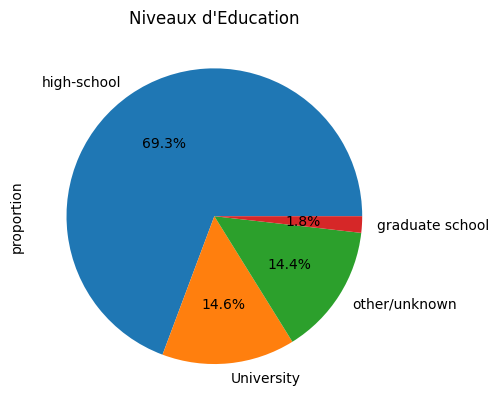

In [52]:
# Education 
df["Education"].replace({0:'other/unknown', 1:'high-school', 2:'University', 3:'graduate school'}).value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%') 
plt.title("Niveaux d'Education") 
plt.savefig('g3.png')  # Enregistrer l'image

plt.show()
plt.close()

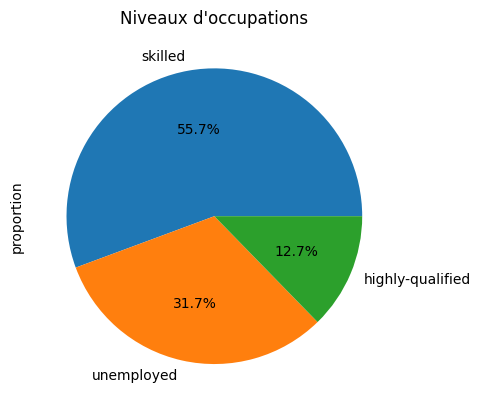

In [53]:
# Occupation 
df["Occupation"].replace({0:'unemployed', 1:'skilled', 2:'highly-qualified'}).value_counts(normalize=True).plot(kind='pie',  autopct='%1.1f%%') 
plt.title("Niveaux d'occupations") 
plt.savefig('g4.png')  # Enregistrer l'image

plt.show()
plt.close()

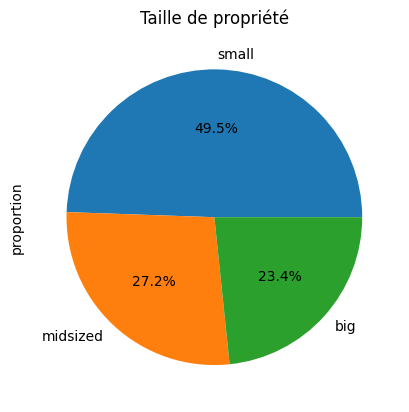

In [54]:
# Settlement size 
df["Settlement size"].replace({0:'small', 1:'midsized', 2:'big'}).value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%') 
plt.title('Taille de propriété') 
plt.savefig('g5.png')  # Enregistrer l'image

plt.show()
plt.close()

Visualisons à présent les corrélations entre variables :

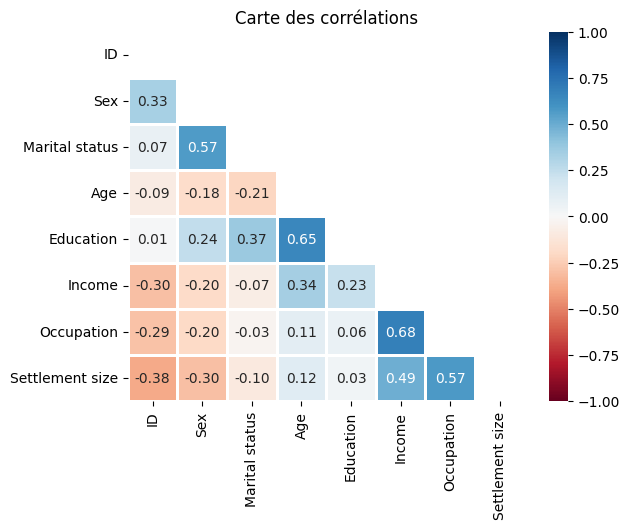

In [55]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool)) 
sns.heatmap(df.corr(), mask=mask, center=0, cmap='RdBu', linewidths=1, annot=True, fmt=".2f", vmin=-1, vmax=1) 
plt.title('Carte des corrélations') 
plt.savefig('g6.png')  # Enregistrer l'image

plt.show()
plt.close()

SEGMENTATION AVEC KMEANS

In [18]:
# Standardisation des données 
 
scaler = StandardScaler() 
 
df_std = scaler.fit_transform(df)

Afin de trouver le meilleur nombre de cluster par la méthode du coude, nous allons exécuter 
l'algorithme pour k allant de 1 à 10. 

WCSS est la somme des carrés des distances de chaque point de données dans tous les clusters 
à leurs centres de gravité respectifs. L'idée est de pouvoir minimiser cette somme (Inertie du 
système). 

In [21]:
# Clustering 
 
seed = 111 
 
wcss = []  
 
for i in range(1,11): 
     
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = seed) 
     
    kmeans.fit(df_std) 
     
    wcss.append(kmeans.inertia_) 

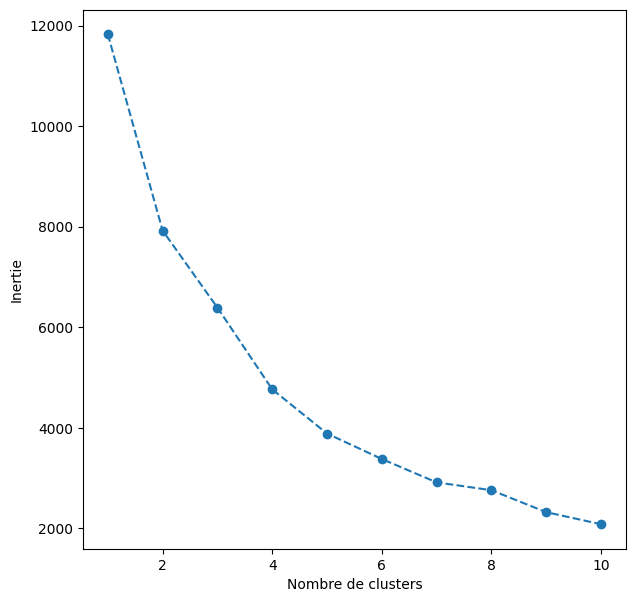

In [56]:
# Méthode du coude pour le choix du nombre de clusters 
 
plt.figure(figsize = (7,7)) 
 
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--') 
 
plt.xlabel('Nombre de clusters') 
plt.ylabel('Inertie') 
plt.savefig('g7.png')  # Enregistrer l'image

plt.show()
plt.close()

Nous choisirons 4 comme nombre de clusters. Exécutons à nouveau KMeans pour cette valeur 
fixe de k. 

In [24]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = seed) 
kmeans.fit(df_std) 

KMeans(n_clusters=4, random_state=111)

Il est temps d'explorer les résultats de notre segmentation. Tout d'abord, créons un nouveau bloc 
de données avec les entités d'origine et ajoutons une nouvelle colonne avec les clusters attribués 
pour chaque point. 

In [25]:
df_segm_kmeans = df.copy() 
df_segm_kmeans['Cluster'] = kmeans.labels_ 
df_segm_kmeans.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster
0,100000001,0,0,67,2,124670,1,2,2
1,100000002,1,1,22,1,150773,1,2,3
2,100000003,0,0,49,1,89210,0,0,0
3,100000004,0,0,45,1,171565,1,1,0
4,100000005,0,0,53,1,149031,1,1,0


In [26]:
# Centroïde de chaque cluster 
centroid = df_segm_kmeans.groupby(['Cluster']).mean() 
centroid 

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Cluster,,,,,,,,
0,1.000006e+08,0.000000,0.001799,36.940647,0.678058,138675.717626,1.161871,1.291367
1,1.000015e+08,0.654219,0.500692,32.143845,0.901798,92781.020747,0.293223,0.020747
2,1.000008e+08,0.501754,0.691228,55.607018,2.126316,152165.140351,1.017544,0.992982
3,1.000008e+08,0.683486,0.993119,27.961009,1.011468,124672.926606,1.084862,1.059633


Sur la base des caractéristiques de chaque centroïde, l'équipe Marketing peut attribuer un nom 
à chaque groupe de clients. Par exemple, nous remarquons que: 

• Le dernier groupe (cluster 3) concerne les clients qui ont en moyenne 55 ans (les plus 
âgés), un diplôme universitaire, un emploi de direction, les revenus les plus élevés et 
qui vivent dans des villes de taille moyenne. On peut donc dire que c'est le groupe des 
personnes aisées. 

• Le deuxième groupe (cluster 2) concerne les clients qui ont une moyenne d'âge de 36 
ans, qui n'ont pas de diplôme d'études secondaires, sont au chômage, aux revenus les 
plus faibles et vivent dans les petites villes. Ce groupe est tout le contraire du cluster 3. 
On peut donc dire que c'est le groupe de personnes ayant le moins d'opportunités. 
Visualisons les clusters :

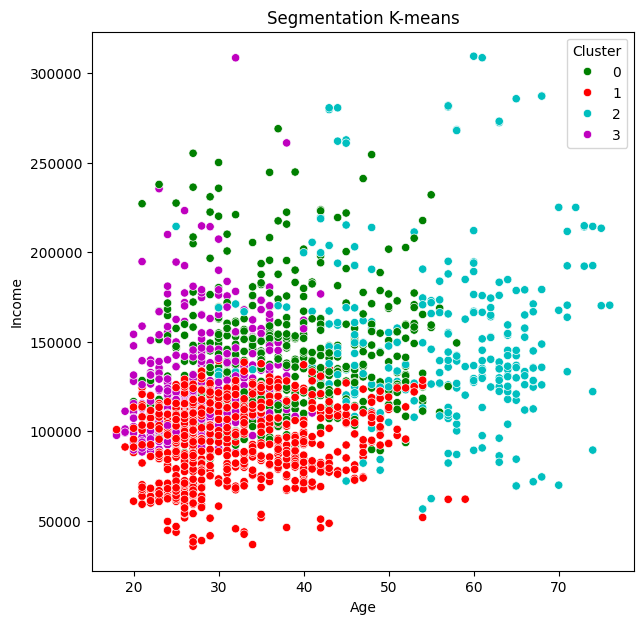

In [57]:
# Chaque point de notre ensemble de données est tracé avec la couleur du cluster auquel il a été attribué. 

x_axis = df_segm_kmeans['Age'] 

y_axis = df_segm_kmeans['Income'] 

hue = df_segm_kmeans['Cluster'] 

plt.figure(figsize = (7, 7)) 

sns.scatterplot(data=df_segm_kmeans, x='Age', y='Income', hue='Cluster', palette=['g', 'r', 'c', 'm'])

plt.title('Segmentation K-means') 

plt.savefig('g8.png')  # Enregistrer l'image

plt.show()
plt.close()

Comme vous le voyez bien sur le graphique, les points sont très mélangés et on ne distingue 
pas bien chaque cluster. Dans la section suivante, nous essaierons d'améliorer notre 
segmentation en combinant Analyse en Composantes Principales et KMeans. 

SEGMENTATION AVEC ACP + KMEANS

In [33]:
# Création d'un modèle PCA (Principal Component Analysis) 
pca = PCA() 
# Ajustement du modèle PCA aux données standardisées 
pca.fit(df_std) 
# Variance expliquée par chaque composante 
print(pca.explained_variance_ratio_) 

[0.34103573 0.23178599 0.16650585 0.09955452 0.06169548 0.04785186
 0.03407515 0.01749541]


Par défaut, le nombre de composantes dans l'algorithme d'ACP est égal au nombre de variables 
de la dataframe originelle. Traçons un graphique de la variance cumulée expliquée en fonction 
du nombre total de composantes. Notre objectif est de garder 80% de toute la variance. 

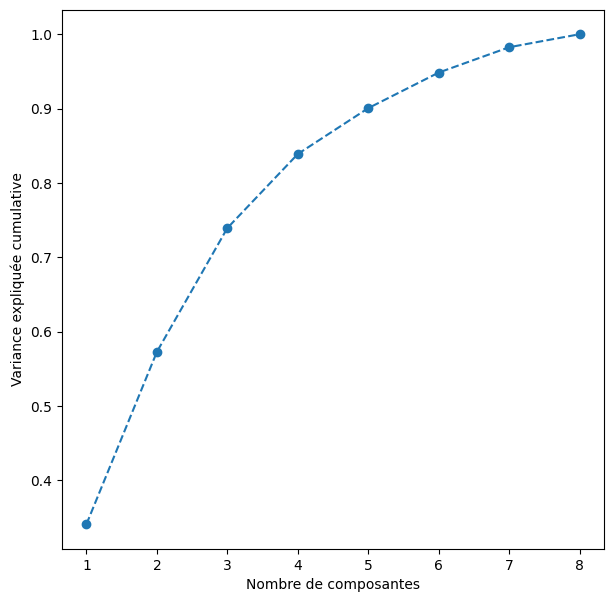

In [ ]:
plt.figure(figsize = (7,7)) 

# Utiliser len(pca.explained_variance_ratio_) pour définir la plage dynamique en fonction du nombre de composantes
n_components = len(pca.explained_variance_ratio_)

# Tracer la variance expliquée cumulative
plt.plot(range(1, n_components + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')

plt.xlabel('Nombre de composantes') 

plt.ylabel('Variance expliquée cumulative') 

plt.show()

Selon le graphique précédent, les trois premières composantes expliquent 80% de la variance.  


In [38]:
# ACP avec 3 composantes 
 
pca3 = PCA(n_components = 3) 
 
pca3.fit(df_std) 
 
df_pca3_comp = pd.DataFrame(data = pca3.components_, 
                           columns = df.columns.values, 
                           index = ['Component 1', 'Component 2', 'Component 3']) 
df_pca3_comp

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.345410,-0.328586,-0.187269,0.270283,0.104515,0.483844,0.461681,0.454337
Component 2,0.107237,0.421320,0.472083,0.355260,0.652786,0.176284,0.061362,-0.030777
Component 3,0.143522,-0.317959,-0.485433,0.613442,0.252258,-0.123601,-0.344566,-0.262126


Nous pouvons maintenant refaire une segmentation avec les données transformées par l'ACP. 


In [39]:
scores_pca3 = pca3.transform(df_std) 
 
wcss = [] 
 
for i in range(1,11): 
     
    kmeans_pca3 = KMeans(n_clusters = i, init = 'k-means++', random_state = seed) 
    kmeans_pca3.fit(scores_pca3) 
     
    wcss.append(kmeans_pca3.inertia_) 

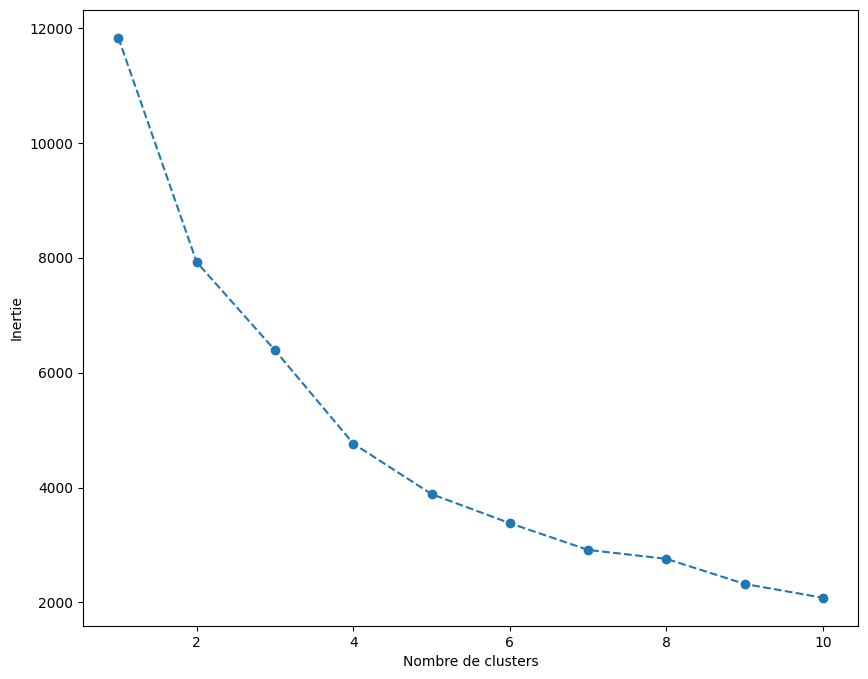

In [40]:
# Méthode du coude pour le choix du nombre de clusters 
 
plt.figure(figsize = (10,8)) 
 
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--') 
 
plt.xlabel('Nombre de clusters') 
plt.ylabel('Inertie') 
plt.show()

Selon la méthode du coude, nous choisissons 4 comme nombre de clusters. 


In [41]:
kmeans_pca3 = KMeans(n_clusters = 4, init = 'k-means++', random_state = seed) 
kmeans_pca3.fit(scores_pca3)

KMeans(n_clusters=4, random_state=111)

In [44]:
# Création de la dataframe avec les variables d'origine, les composantes PCA et les étiquettes des clusters
df_segm_pca3_kmeans = pd.concat([df.reset_index(drop=True), pd.DataFrame(scores_pca3)], axis=1)

# Assure-toi que seules les colonnes de scores PCA sont renommées
# Ici, nous renommerons uniquement les colonnes de composantes (les dernières 3 colonnes)

df_segm_pca3_kmeans.columns.values[-3:] = ['Component 1', 'Component 2', 'Component 3']

# Ajouter les étiquettes des clusters
df_segm_pca3_kmeans['Cluster PCA'] = kmeans_pca3.labels_

# Afficher le début de la dataframe
df_segm_pca3_kmeans.head()


,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Cluster PCA
0,100000001,0,0,67,2,124670,1,2,2.859782,0.936676,2.036586,3
1,100000002,1,1,22,1,150773,1,2,0.944130,0.394492,-2.433785,1
2,100000003,0,0,49,1,89210,0,0,-0.023032,-0.881797,1.974083,2
3,100000004,0,0,45,1,171565,1,1,2.212422,-0.563616,0.635332,0
4,100000005,0,0,53,1,149031,1,1,2.110202,-0.425124,1.127543,0


In [45]:
# Centroïdes 
centroid_pca3 = df_segm_pca3_kmeans.groupby(['Cluster PCA']).mean() 
centroid_pca3 

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
Cluster PCA,,,,,,,,,,,
0,1.000006e+08,0.000000,0.073883,36.580756,0.701031,140068.340206,1.207904,1.333333,1.491301,-1.093804,0.038948
1,1.000010e+08,0.809430,0.982318,27.691552,1.005894,118949.499018,1.017682,0.777996,-0.451101,0.477999,-1.263391
2,1.000014e+08,0.570064,0.406051,33.210191,0.891720,89589.073248,0.164013,0.022293,-1.639791,-0.335010,0.596403
3,1.000009e+08,0.512456,0.693950,55.434164,2.120996,155095.483986,1.056940,1.039146,1.393103,2.148325,0.874939


Visualisons les clusters : 

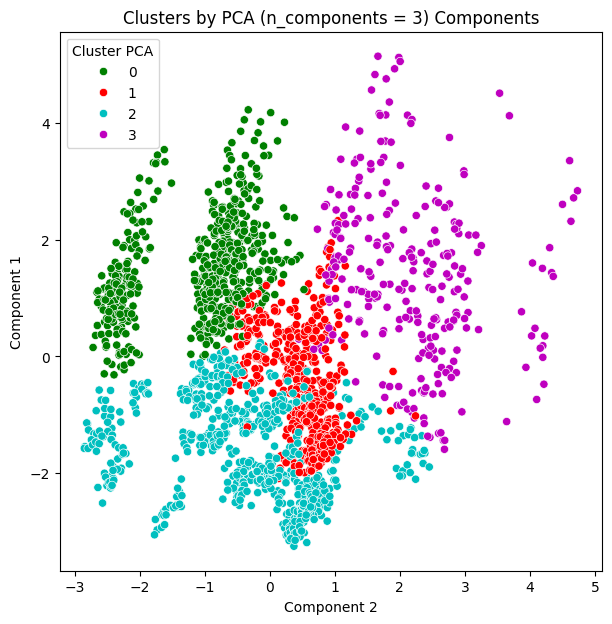

In [63]:
# Définir les axes X et Y et la couleur (hue)
x_axis = df_segm_pca3_kmeans['Component 2'] 
y_axis = df_segm_pca3_kmeans['Component 1'] 
hue = df_segm_pca3_kmeans['Cluster PCA'] 

# Créer le graphique
plt.figure(figsize=(7, 7))
sns.scatterplot(x=x_axis, y=y_axis, hue=hue, palette=['g', 'r', 'c', 'm'])

# Ajouter le titre
plt.title('Clusters by PCA (n_components = 3) Components')

# Afficher le graphique
plt.savefig('g9.png')  # Enregistrer l'image

plt.show()
plt.close()


Les points sont mieux regroupés au niveau de chaque cluster ce qui permet de mieux distinguer 
chaque cluster. Cette segmentation est meilleure que la première faite avec uniquement 
l'algorithme KMeans. 

CONCLUSION  
La segmentation des clients est très importante pour toute entreprise et permet d'analyser le 
comportement des clients. L'algorithme K-means combiné avec PCA est un outil puissant et 
facile à utiliser pour effectuer une bonne segmentation. 

### Rapport automatisé - Projet : ANALYSE D’UNE CAMPAGNE MARKETING AVEC PANDAS

In [70]:
from fpdf import FPDF
from PIL import Image

# Créer un document PDF
pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()

# Titre du PDF
pdf.set_font('Arial', 'B', 12)

# Texte du titre divisé sur deux lignes
text = "Rapport Automatisé - Projet : Combinaison des techniques de Clustering\net d'ACP pour la Segmentation de clientèle"

# Remplacer les apostrophes typographiques et autres caractères problématiques
text = text.replace('’', "'").replace('“', '"').replace('”', '"')

# Ajouter le titre au PDF sur deux lignes
pdf.multi_cell(0, 10, txt=text, align='C')

# Ajout de texte
pdf.set_font('Arial', '', 12)
pdf.ln(10)  # Nouvelle ligne
pdf.multi_cell(0, 10, txt="Voici un résumé des résultats obtenus pour le projet réalisé.")

# Initialiser la position verticale pour les images
y_position = 80  # Position de départ pour la première image (ajusté pour laisser un peu d'espace en haut)

# Liste des images à insérer
images = ['g1.png', 'g2.png', 'g3.png', 'g4.png', 'g5.png', 
          'g6.png', 'g7.png', 'g8.png', 'g9.png']

# Largeur d'image fixe
image_width = 180

# Ajouter les images avec un espacement amélioré
for image in images:
    try:
        # Calculer la hauteur réelle de l'image
        img = Image.open(image)
        img_width, img_height = img.size
        
        # Calculer la nouvelle hauteur de l'image en fonction de la largeur
        aspect_ratio = img_height / img_width
        image_height = image_width * aspect_ratio

        # Ajouter un espacement entre les images
        if y_position + image_height > 270:  # Vérifie si l'image dépasse la page
            pdf.add_page()  # Ajouter une nouvelle page si nécessaire
            y_position = 20  # Réinitialiser la position à la première ligne de la nouvelle page

        # Ajouter l'image dans le PDF
        pdf.image(image, x=10, y=y_position, w=image_width, h=image_height)
        
        # Ajuster la position verticale pour la prochaine image
        y_position += image_height + 15  # Ajouter un espacement de 15 px après chaque image

    except FileNotFoundError:
        print(f"L'image {image} est introuvable et sera ignorée.")

# Sauvegarder le fichier PDF
pdf.output("rapport_automatique.pdf")


''